### Simulation of a pendulum

Let:

$ l $ be the length of the pendulum

$ g $ be the gravitational constant. You can define $ m $ as mass but it cancels.

$ \theta $ be the pendulum's angle

$ t $ be time

Deriving the differential equation used below is based on [this notebook](https://github.com/JasonThomasData/maths_notes/blob/master/differential_equations/Harmonic%20Oscillators.ipynb), under "Regarding Pendulums"

$ \theta'' + \frac{g}{l} \sin \theta = 0 $

$ x_1 = \theta $

$ x_1' = \theta' = x_2 $

Then we have this system of equations:

$ x_1' = x_2 $

$ x_2' = -\frac{g}{l} \sin x_1 $

So far it's an undamped harmonic oscillator.

But, we can introduce a damping effect.

Let:

$ k $ be friction. If $ k = 0 $ there is no friction and the phase plot will be neither a spiral sink or spiral source.

$ x_1' = x_2 $

$ x_2' = -\frac{g}{l} \sin x_1 - k x_2 $

$ x0 $ be the initial condition, a vector $ [x_1, x_2] $. The first element can be $ pi $, and that effectively means the pendulum points directly upwards.


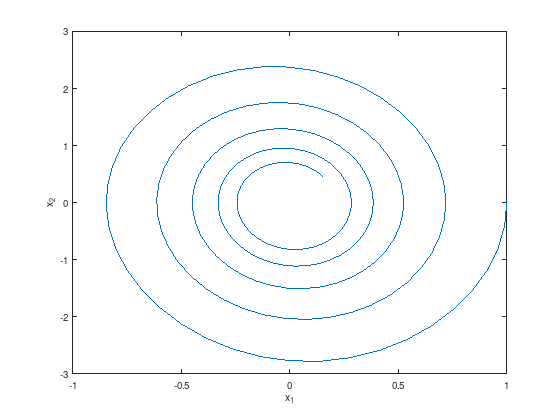

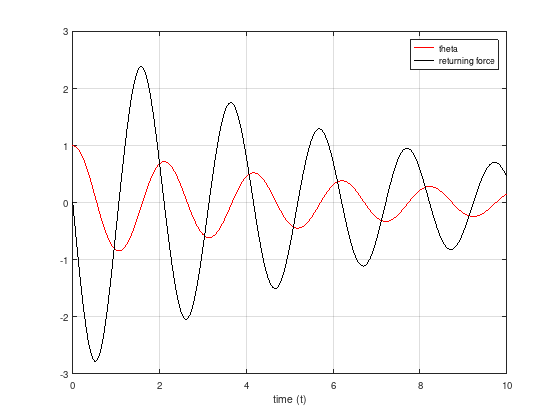

In [101]:
function dx = dynamics_pendulum(t,x)
    k = 0.3;
    l=1; 
    g=9.81; 
    dx=[x(2);
        -(g/l)*sin(x(1))-k*x(2)];
end

time_step=0.05;
t=[0:time_step:10];

x0=[1; 0];
[t2,solution]=ode45(@dynamics_pendulum,t,x0);
x1=solution(:,1);
x2=solution(:,2);

plot(t2,x1,'r');
grid;
hold on;
plot(t2,x2,'k');
legend("theta", "returning force")
xlabel("time (t)");
hold off;

figure;
plot(x1, x2);
xlabel("x_1");
ylabel("x_2");

### System of 2 pendulums on a shared platform

When there are two harmonic oscillators that share a platform, then you can model the situation with a system of four equations.

Each pendulum dampens the other.

To do this we should let:

$ n $ be a nudge constant, $ n < k $.

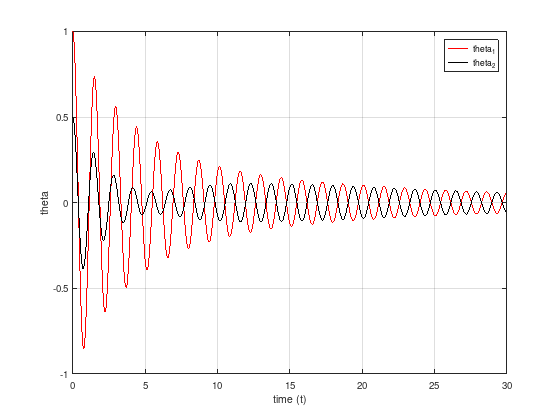

In [103]:
function dx = dynamics_pendulum(t,x)
    k_background = 0.1;
    n = 0.2;
    k = n + k_background;
    l=.5; 
    g=9.81;
    dx(1) = x(2); 
    dx(2) = -(g/l)*sin(x(1))-k*x(2) -n*x(4); 
    dx(3) = x(4);
    dx(4) = -(g/l)*sin(x(3))-k*x(4) -n*x(2);
end

time_step=0.05;
t=[0:time_step:30];

x0=[1; 0; 0.5; 0];
[t2,solution]=ode45(@dynamics_pendulum,t,x0);
x1=solution(:,1);
x3=solution(:,3);

plot(t2,x1,'r');
grid;
hold on;
plot(t2,x3,'k');
legend("theta_1", "theta_2")
xlabel("time (t)");
ylabel("theta");
hold off;

### System of 3 pendulums on a shared platform

As above, but if two pendulums are stationary at the initial condition then the counter force to dominating pendulum is distributed across the (initially) stationary pendula. 

The dampening that each pendulum receives is the average of the other two. If there are two pendula that are initially at rest then those two will each have $ \theta $ of half the dominant pendulum after a time. In this case the shared platform ceases to move because the forces cancel each other.

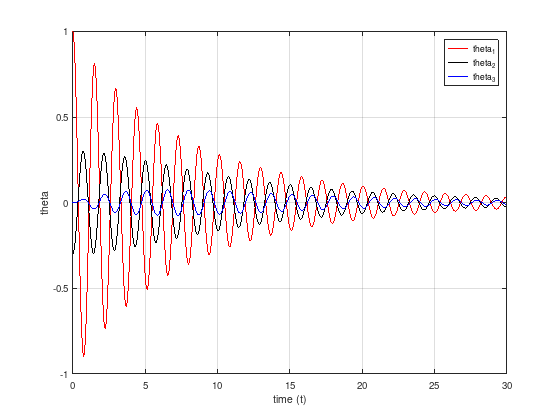

In [104]:
function dx = dynamics_pendulum(t,x)
    k_background = 0.1;
    n = 0.2;
    k = n + k_background;
    l=.5;
    g=9.81;
    dx(1) = x(2); 
    dx(2) = -(g/l)*sin(x(1))-k*x(2) -n*(x(4) + x(6))/2; 
    dx(3) = x(4);
    dx(4) = -(g/l)*sin(x(3))-k*x(4) -n*(x(2) + x(6))/2;
    dx(5) = x(6);
    dx(6) = -(g/l)*sin(x(5))-k*x(6) -n*(x(2) + x(4))/2;
end

time_step=0.05;
t=[0:time_step:30];

x0=[1; 0; -0.3; 0; 0; 0];
[t2,solution]=ode45(@dynamics_pendulum,t,x0);
x1=solution(:,1);
x3=solution(:,3);
x5=solution(:,5);

plot(t2,x1,'r');
grid;
hold on;
plot(t2,x3,'k');
plot(t2,x5,'b');
legend("theta_1", "theta_2", "theta_3")
xlabel("time (t)");
ylabel("theta");
hold off;